# Librosa Image Display
This Document contains funtions that can be called to display an audio file as either a wave fuction, or a Mel-spectrogram. Each fucntion takes a number of variables, allowing for flexability in how the image is displayed

In [3]:
#Import libraries
import warnings
warnings.filterwarnings('ignore')
import os
import librosa, librosa.display
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

from IPython.display import Audio
import soundfile as sf
import random
import audiomentations
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

#%matplotlib inline

In [4]:
#Initialise variables
n_mels=256
hop_length=128
fmax=8000
AUDIO_CLIP_DURATION = 5 # seconds 
AUDIO_NFFT =  2048
AUDIO_WINDOW = None
AUDIO_STRIDE = 200
AUDIO_SAMPLE_RATE = 48000
AUDIO_MELS = 260
AUDIO_FMIN = 20
AUDIO_FMAX =13000
AUDIO_TOP_DB = 80

# Wave Function  

The below function displays the audio as a wave function and includes a number of optional values that can be included 
on the image.

The input variables are as follows:
- filepath: String, path of the audio file must be provided
- plt_x_axis: Boolean value, entering true plots values on the x axis, entering False removes the legend from the x axis
- plt_y_axis:Boolean value, entering true plots values on the y axis, entering False removes the legend from the y axis
- plt_title: Boolean value, entering true plots a title at the top of the image, entering False removes the title from the image
- image_title: String: If plt_title is true, this string will be presented as a title at the top of the image. OPTIONAL FIELD: default value = 0
- image_width: Integer value, specifys the width of the output image. OPTIONAL FIELD: Default value = 20
- image_height: Integer value, specifys the height of the output image. OPTIONAL FIELD: Default value = 10


In [5]:
def DisplayWave(filepath,plt_x_axis,plt_y_axis,plt_title,image_title = " ", image_width = 20,image_height = 10):
    audio, sr = librosa.load(filepath)
    plt.figure(figsize = (image_width,image_height))
    librosa.display.waveshow(y=audio, sr=sr)
    if plt_title:
        plt.title(image_title, fontdict=dict(size=18))
    if plt_x_axis:    
        plt.xlabel('Time', fontdict=dict(size=15))
    if plt_y_axis:
        plt.ylabel('Amplitude', fontdict=dict(size=15))
    plt.show()

# Mel Spectrogram

The below function displays the audio converted into a mel-spectrogram and incluides a number of optional values that can be included on the image

The input variables are as follows:
- filepath: String, path of the audio file must be provided
- plt_x_axis: Boolean value, entering true plots values on the x axis, entering False removes the legend from the x axis
- plt_y_axis:Boolean value, entering true plots values on the y axis, entering False removes the legend from the y axis
- plt_colourBar:Boolean value, entering true plots a colour bar legend on the side of the image to show the values of the colours in the image
- plt_title: Boolean value, entering true plots a String title at the top of the image, entering False removes the title from the image
- plt_shape: Boolean value, True Prints the shape of the Mel spec in the title of the image
- image_title: String: If plt_title is true, this string will be presented as a title at the top of the image. OPTIONAL FIELD: Default value = " "
- image_width: Integer value, specifys the width of the output image. OPTIONAL FIELD: Default value = 15
- image_height: Integer value, specifys the height of the output image. OPTIONAL FIELD: Default value = 10

In [6]:
def DisplayMelSpec(filepath,plt_x_axis,plt_y_axis,plt_colourBar,plt_title,plt_shape, image_title = " ",image_width=15,image_height = 10):
    if plt_x_axis:
        x_axis_label ='time'
    else:
        x_axis_label =None
        
    if plt_y_axis:
        y_axis_label ='mel'
    else:
        y_axis_label =None   
    
    audio, sr = librosa.load(filepath)                     
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr,n_mels=AUDIO_MELS, hop_length=AUDIO_STRIDE, fmax=AUDIO_FMAX)
    fig = plt.figure(figsize = (image_width,image_height))
    ax = fig.add_subplot(111)

    img = librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max),x_axis=x_axis_label,  y_axis=y_axis_label, hop_length = 128, fmax=8000)
    Plot_colourBar=plt_colourBar
    if Plot_colourBar:
        fig.colorbar(img, ax=ax, format=f'%0.2f dB')
    
    
    if plt_title and plt_shape:
        plt.title(image_title + "  ( "+str(mel_spectrogram.shape[0])+ " , "+ str(mel_spectrogram.shape[1])+" )")
    elif plt_title:
        plt.title(image_title)
    elif plt_shape:
        plt.title("  ( "+str(mel_spectrogram.shape[0])+ " , "+ str(mel_spectrogram.shape[1])+" )")
    plt.show()

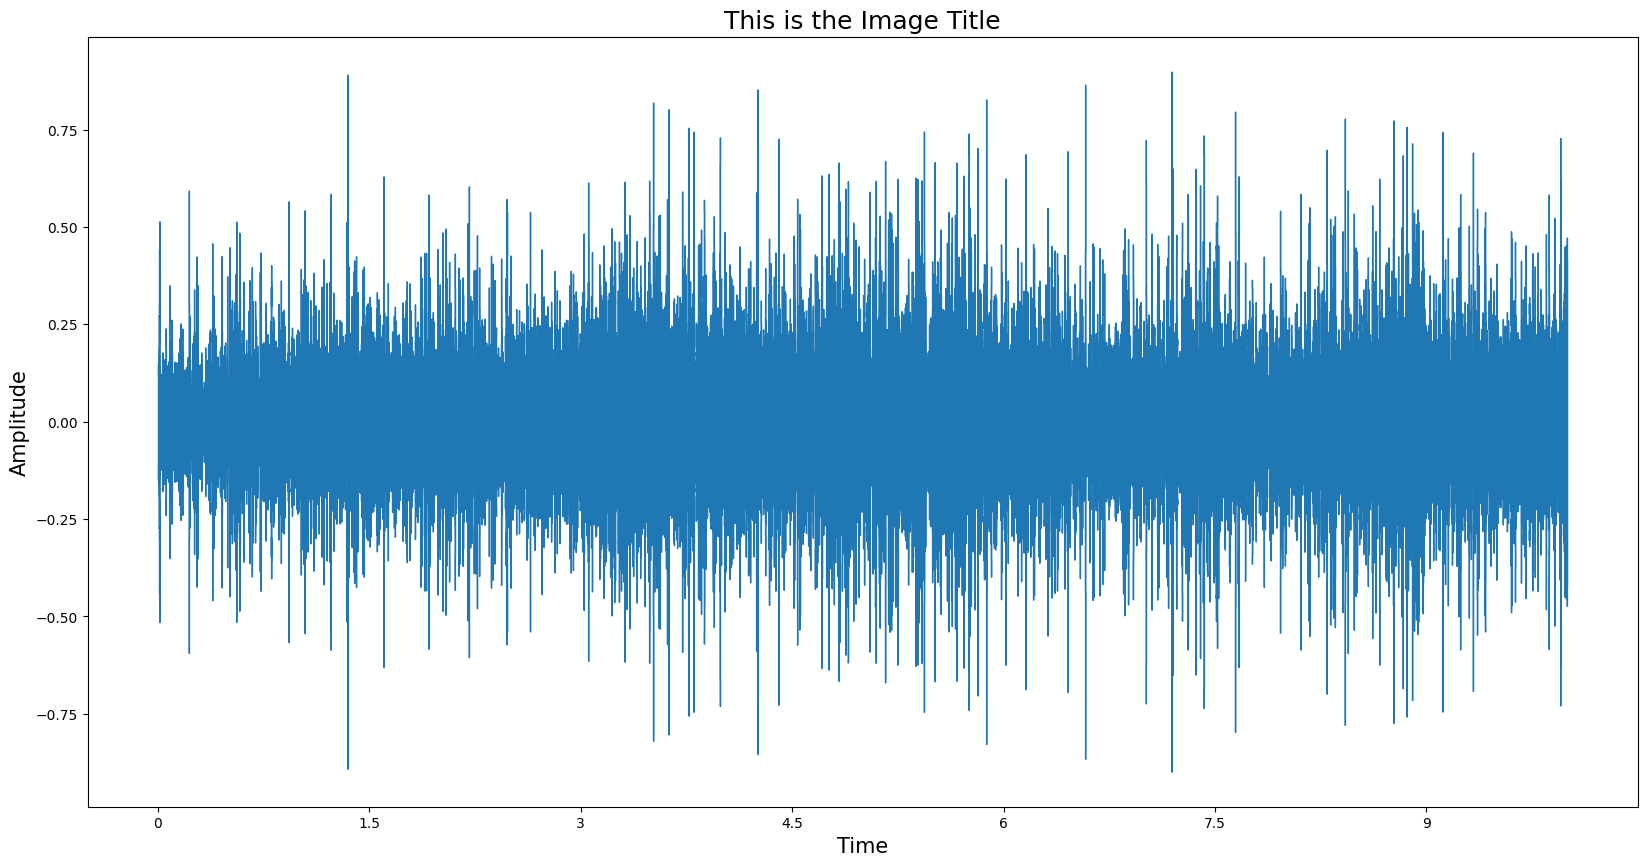

In [32]:
DisplayWave("test_data/rain4.aiff",True,True,True,"This is the Image Title")

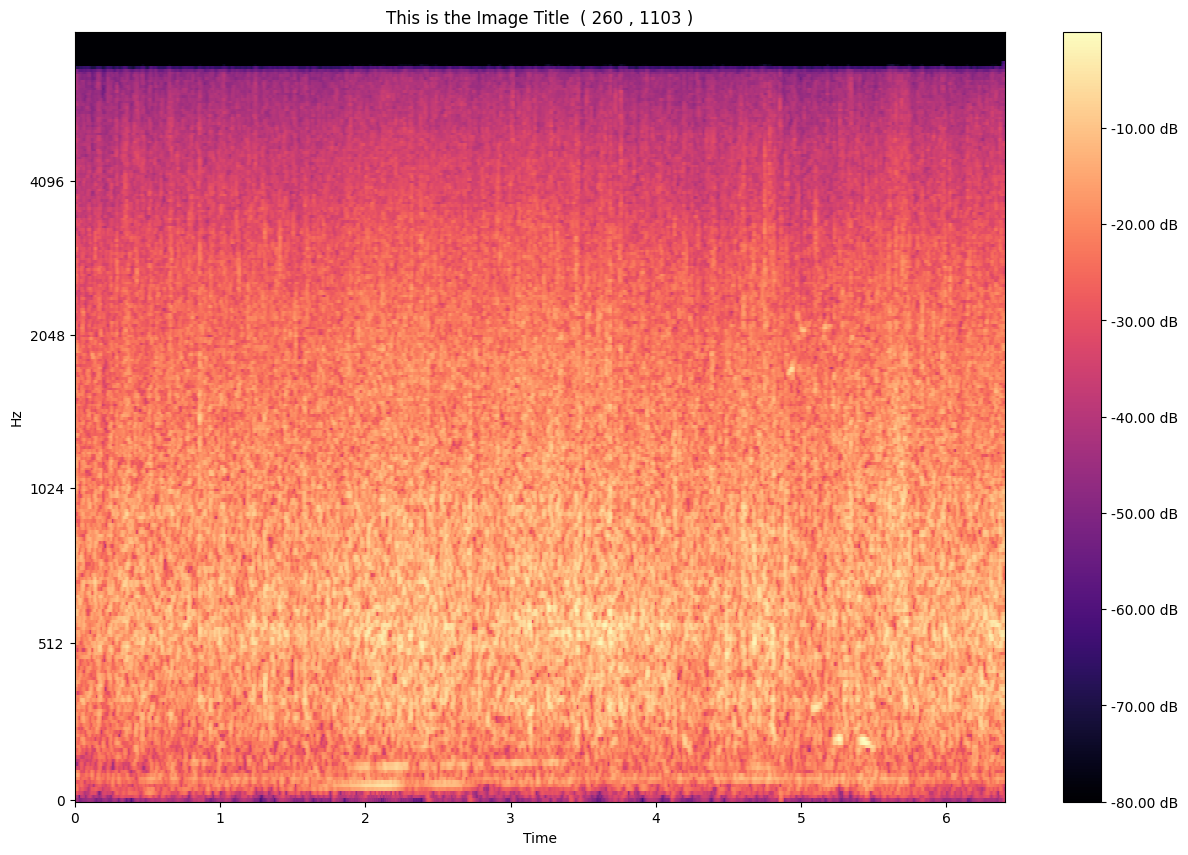

In [49]:
DisplayMelSpec("test_data/rain4.aiff",True,True,True,True,True,"This is the Image Title")

In [69]:
#Example directory with appropriate audio files
file_path="C:\\Users\\User\\Documents\\Uni\\2023\\Semester 2\\test_data"
#Create an empty list
audio_files=[]
#cycle through file names in file path
for file in os.listdir(file_path):
    audio_files.append(file)

# Show Example Image

The below function takes in a list of files names for audio files, and a returns a randon sample size from the group

The input variables are as follows:
- list_of_images : a list of file names for audio files that can be converted into a mel-spec
- number_of_images_to_display: An integer value, that reflects the number of images to return 

In [67]:
def show_example_images(list_of_images, number_of_images_to_display):
    #Shuffle the list so we can get a random sample 
    random.shuffle(list_of_images)
    count=0
    exit = False
    #Run code while we have displayed less then the request and there are still files in the list
    while count < number_of_images_to_display and exit == False:
        file=list_of_images.pop(0)
        full_path = file_path+"\\"+file
        DisplayMelSpec(full_path,True,True,True,True,True,"This is the Image Title")
        count = count + 1
        if len(list_of_images) == 0:
            exit = True

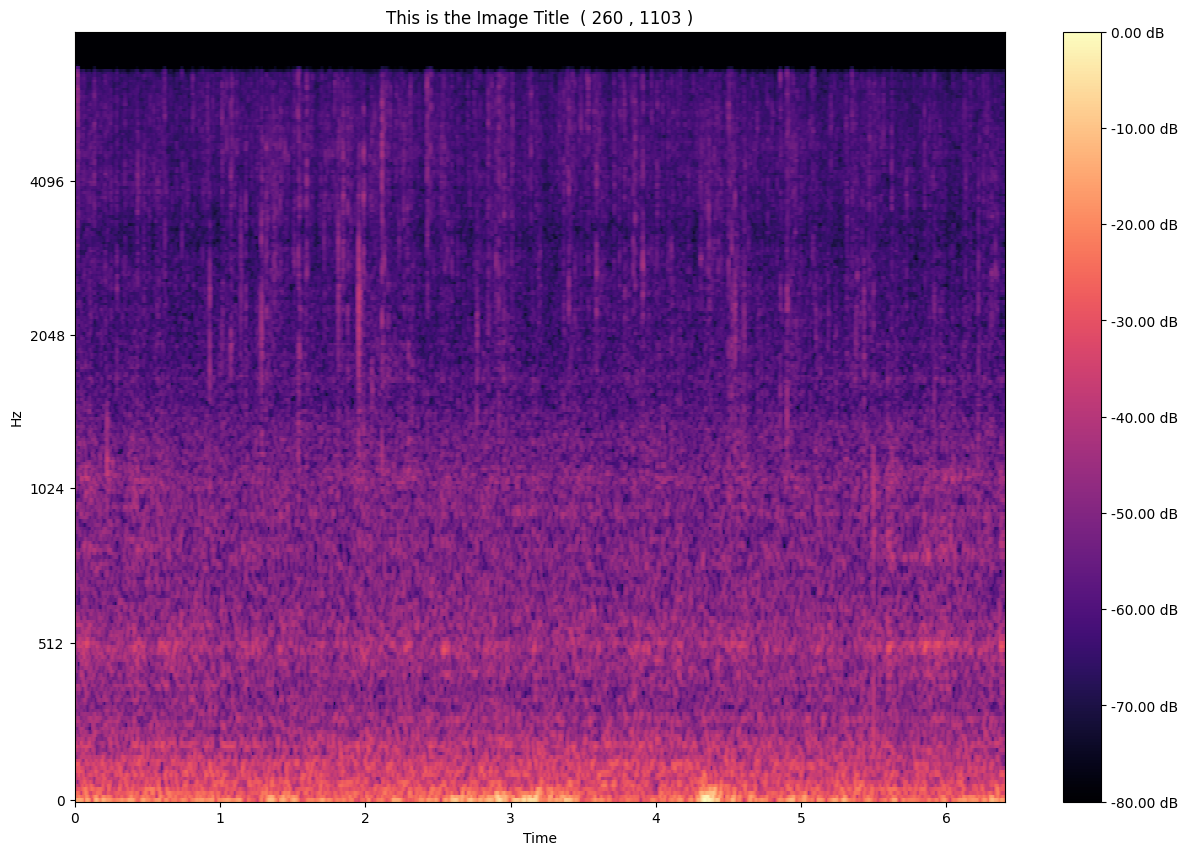

In [70]:
show_example_images(audio_files,2)


# Show Images after applying augmentations

The following script takes an input path and an output path. It takes the Audio from the input path, and applies a number of augmentations to it, displaying and saving an image of each augmentation. Finally it applies all augmentations and displays the saved image after augmentations 

In [12]:
def display_img_after_aug(input_path,output_path):
    fileExtension = input_path.rsplit(".",1)[-1]
    output_path= output_path + "Gaus."+fileExtension
    #Apply only Gaussian Noise
    audio, sr = librosa.load(input_path)
    augment= Compose([
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.2),
        ])
    augmented_audio = augment(samples=audio, sample_rate=sr)
    sf.write(output_path,augmented_audio,sr)

    DisplayMelSpec(input_path,True,True,True,True,True,"Before Augmentations")
    DisplayMelSpec(output_path,True,True,True,True,True,"After Gaussian Noise Applied")

    #Apply only TimeStretch
    output_path= output_path + "TimeS."+fileExtension
    audio, sr = librosa.load(input_path)
    augment= Compose([
        TimeStretch(min_rate=0.8, max_rate=1.25, p=0.2),
        ])
    augmented_audio = augment(samples=audio, sample_rate=sr)
    sf.write(output_path,augmented_audio,sr)

    DisplayMelSpec(output_path,True,True,True,True,True,"After time stretch")

    
    #Apply only PitchShift
    output_path= output_path + "Pitch."+fileExtension
    audio, sr = librosa.load(input_path)
    augment= augmentations = Compose([
        PitchShift(min_semitones=-4, max_semitones=4, p=0.2),
        ])
    augmented_audio = augment(samples=audio, sample_rate=sr)
    sf.write(output_path,augmented_audio,sr)

    DisplayMelSpec(output_path,True,True,True,True,True,"After Pitch Shift")


    #Apply only Shift
    output_path= output_path + "Shift."+fileExtension
    augment= Compose([
        Shift(min_fraction=-0.5, max_fraction=0.5, p=0.2),
        ])
    augmented_audio = augment(samples=audio, sample_rate=sr)
    sf.write(output_path,augmented_audio,sr)

    DisplayMelSpec(output_path,True,True,True,True,True,"After Shift")

    #Apply all Augmentations
    output_path= output_path + "AllAug."+fileExtension
    audio, sr = librosa.load(input_path)
    augment = Compose([
        # Add Gaussian noise with a random amplitude to the audio
        # This can help the model generalize to real-world scenarios where noise is present
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.2),

        # Time-stretch the audio without changing its pitch
        # This can help the model become invariant to small changes in the speed of the audio
        TimeStretch(min_rate=0.8, max_rate=1.25, p=0.2),

        # Shift the pitch of the audio within a range of semitones
        # This can help the model generalize to variations in pitch that may occur in real-world scenarios
        PitchShift(min_semitones=-4, max_semitones=4, p=0.2),

        # Shift the audio in time by a random fraction
        # This can help the model become invariant to the position of important features in the audio
        Shift(min_fraction=-0.5, max_fraction=0.5, p=0.2),
    ])
    augmented_audio = augment(samples=audio, sample_rate=sr)
    sf.write(output_path,augmented_audio,sr)
    DisplayMelSpec(output_path,True,True,True,True,True,"After all Augmentations")

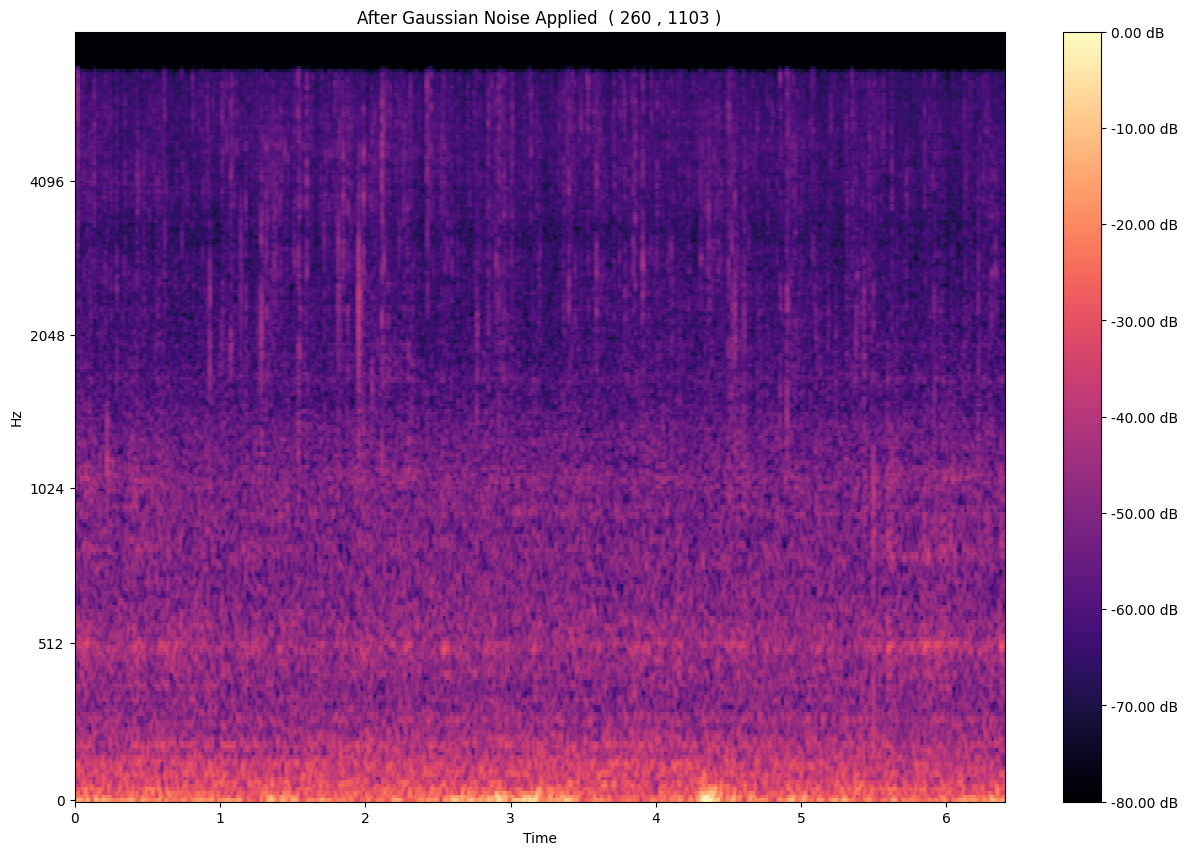

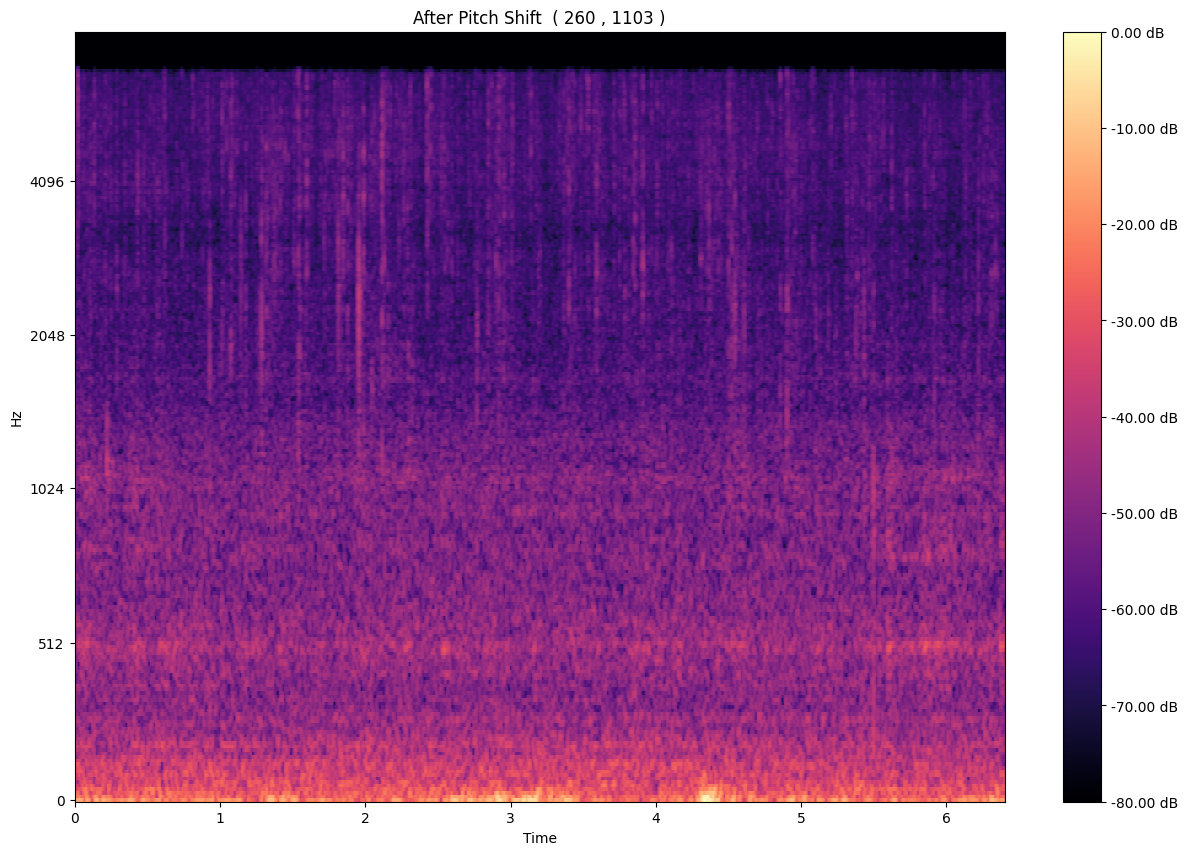

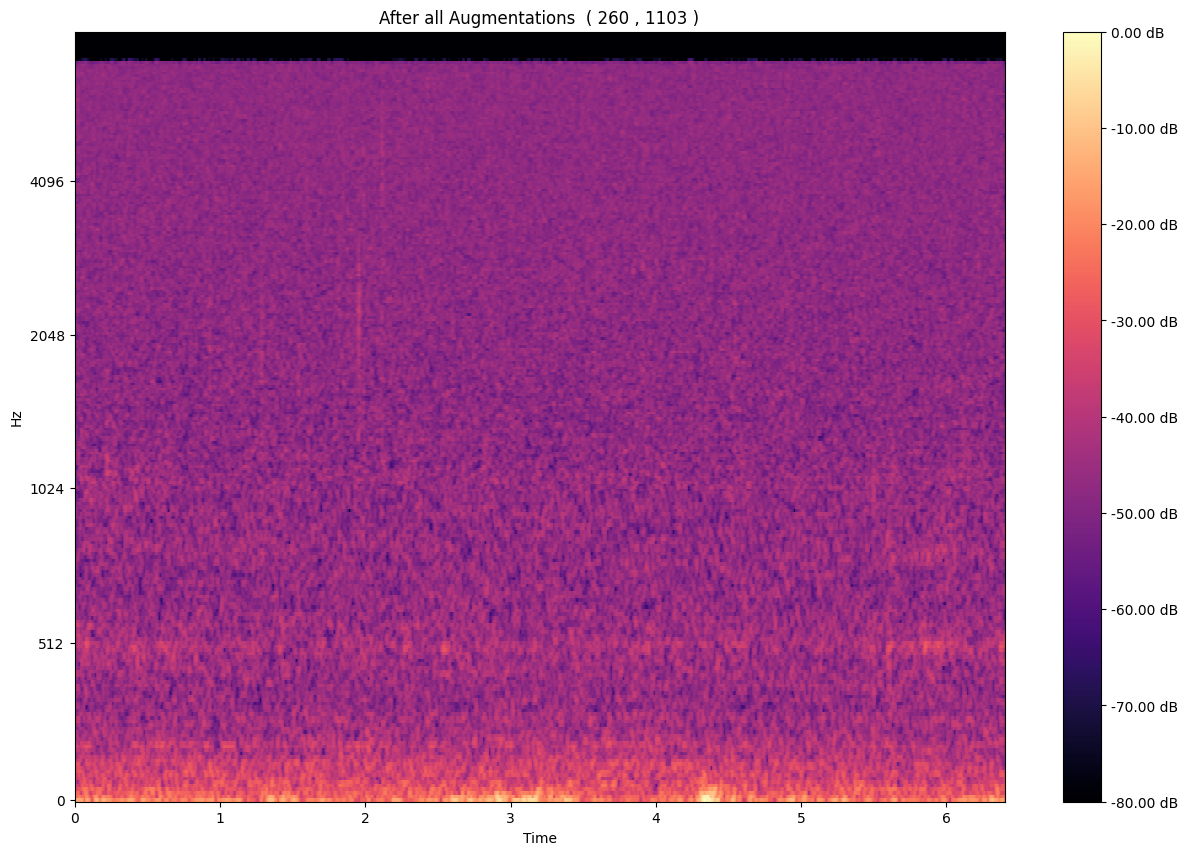

In [13]:
output_path= "test_data/"
input_path = "test_data/rain3.wav"
display_img_after_aug(input_path,output_path)